In [1]:
# Description: This program uses an artificial Recurrent Neural Network (RNN) called Long Short Memory (LSTM) to predict the 
# closing stock price of a corporation (Apple.Inc.) using the past 60 days stock price. 

In [2]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-10-07')
#Shoe the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678082
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818834
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952844
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932296
...,...,...,...,...,...,...
2021-10-01,142.919998,139.110001,141.899994,142.649994,94639600.0,142.649994
2021-10-04,142.210007,138.270004,141.759995,139.139999,98322000.0,139.139999
2021-10-05,142.240005,139.360001,139.490005,141.110001,80861100.0,141.110001


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2458, 6)

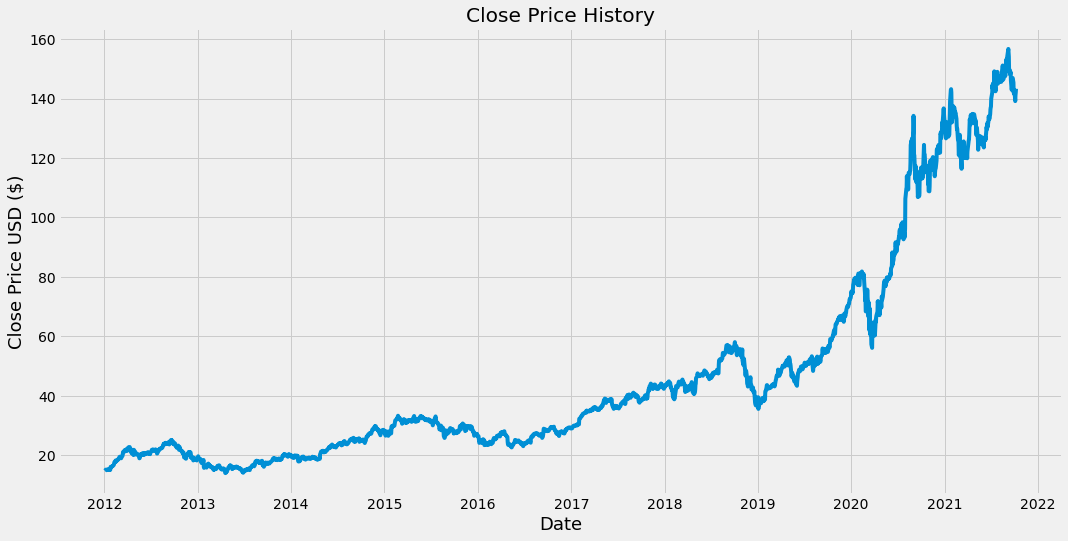

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1967

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.8908524 ],
       [0.8970874 ],
       [0.9061246 ]])

In [9]:
#Create the training data set
#create thr scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00744847, 0.0092274 , 0.007476  ,
       0.01404377, 0.01353586, 0.0141989 , 0.01563254, 0.01650074,
       0.01642818, 0.01616047, 0.01730138, 0.01837474, 0.01959072,
       0.0215548 , 0.02568061, 0.02574316, 0.02804001, 0.02975638,
       0.02680652, 0.02794242, 0.02791991, 0.03110496, 0.03065209,
       0.03149026, 0.03299647, 0.03383465, 0.03624909, 0.03800799,
       0.0385159 , 0.03869355, 0.03568614, 0.03496055, 0.03506814,
       0.03789542, 0.03869105, 0.04039993, 0.04442815, 0.04980247,
       0.04879666, 0.04879916, 0.05268478, 0.05390076, 0.05303505,
       0.05224443, 0.05142127, 0.05415595, 0.05603247, 0.0568181 ])]
[0.05487653421186173]

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1907, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
30/30 [==============================] - 3s 37ms/step - loss: 0.0039
Epoch 2/100
30/30 [==============================] - 1s 34ms/step - loss: 1.6468e-04
Epoch 3/100
30/30 [==============================] - 1s 33ms/step - loss: 8.7329e-05
Epoch 4/100
30/30 [==============================] - 1s 32ms/step - loss: 8.4037e-05
Epoch 5/100
30/30 [==============================] - 1s 34ms/step - loss: 8.2610e-05
Epoch 6/100
30/30 [==============================] - 1s 33ms/step - loss: 7.9221e-05
Epoch 7/100
30/30 [==============================] - 1s 32ms/step - loss: 7.6217e-05
Epoch 8/100
30/30 [==============================] - 1s 34ms/step - loss: 7.2578e-05
Epoch 9/100
30/30 [==============================] - 1s 34ms/step - loss: 7.6068e-05
Epoch 10/100
30/30 [==============================] - 1s 34ms/step - loss: 6.9476e-05
Epoch 11/100
30/30 [==============================] - 1s 33ms/step - loss: 6.4697e-05
Epoch 12/100
30/30 [==============================] - 1s 34ms/step 

30/30 [==============================] - 1s 40ms/step - loss: 2.1210e-05
Epoch 97/100
30/30 [==============================] - 1s 38ms/step - loss: 2.0574e-05
Epoch 98/100
30/30 [==============================] - 1s 35ms/step - loss: 2.1831e-05
Epoch 99/100
30/30 [==============================] - 1s 34ms/step - loss: 2.1317e-05
Epoch 100/100
30/30 [==============================] - 1s 35ms/step - loss: 1.8514e-05


In [15]:
#Create the Testing data set
#create a new array containing scaled values from index 1907 to 2458
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [16]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(491, 60, 1)

In [18]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

1.6449412561482664

<ipython-input-20-8c657e7a7c96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


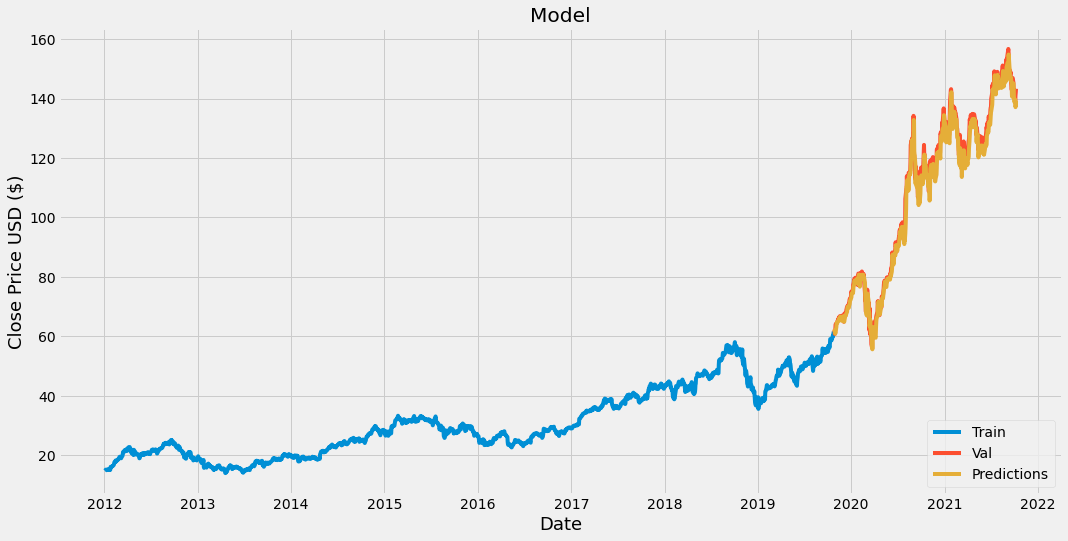

In [20]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-28,62.262501,61.427200
2019-10-29,60.822498,62.056477
2019-10-30,60.814999,61.443527
2019-10-31,62.189999,60.889965
2019-11-01,63.955002,61.480995
...,...,...
2021-10-01,142.649994,138.753845
2021-10-04,139.139999,139.658447
2021-10-05,141.110001,137.100189


In [22]:
#Get the Quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-10-07')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[140.70537]]


In [23]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-10-08', end='2021-10-08')
print(apple_quote2['Close'])

Date
2021-10-07    143.289993
2021-10-08    142.899994
Name: Close, dtype: float64
